# Import important libraries

In [10]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics # metrics SSE MSE RMSE

In [11]:
#Make dataframe
champ=pd.read_csv("/content/perrin-freres-monthly-champagne.csv")

## Basic EDA

In [12]:
#take lookof data
champ.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
#how many rows and columns
champ.shape

(107, 2)

In [14]:
#basic information about data
champ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [15]:
#stastistical info about data
champ.describe().T

,count,mean,std,min,25%,50%,75%,max
Perrin Freres monthly champagne sales millions ?64-?72,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [16]:
#missing values of our dataset in bool
champ.isnull()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
102,False,False
103,False,False
104,False,False
105,True,True


In [17]:
#how many nan or null values  in data
champ.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [18]:
# which dtypes we have in datset
champ.dtypes

Month                                                      object
Perrin Freres monthly champagne sales millions ?64-?72    float64
dtype: object

<Axes: >

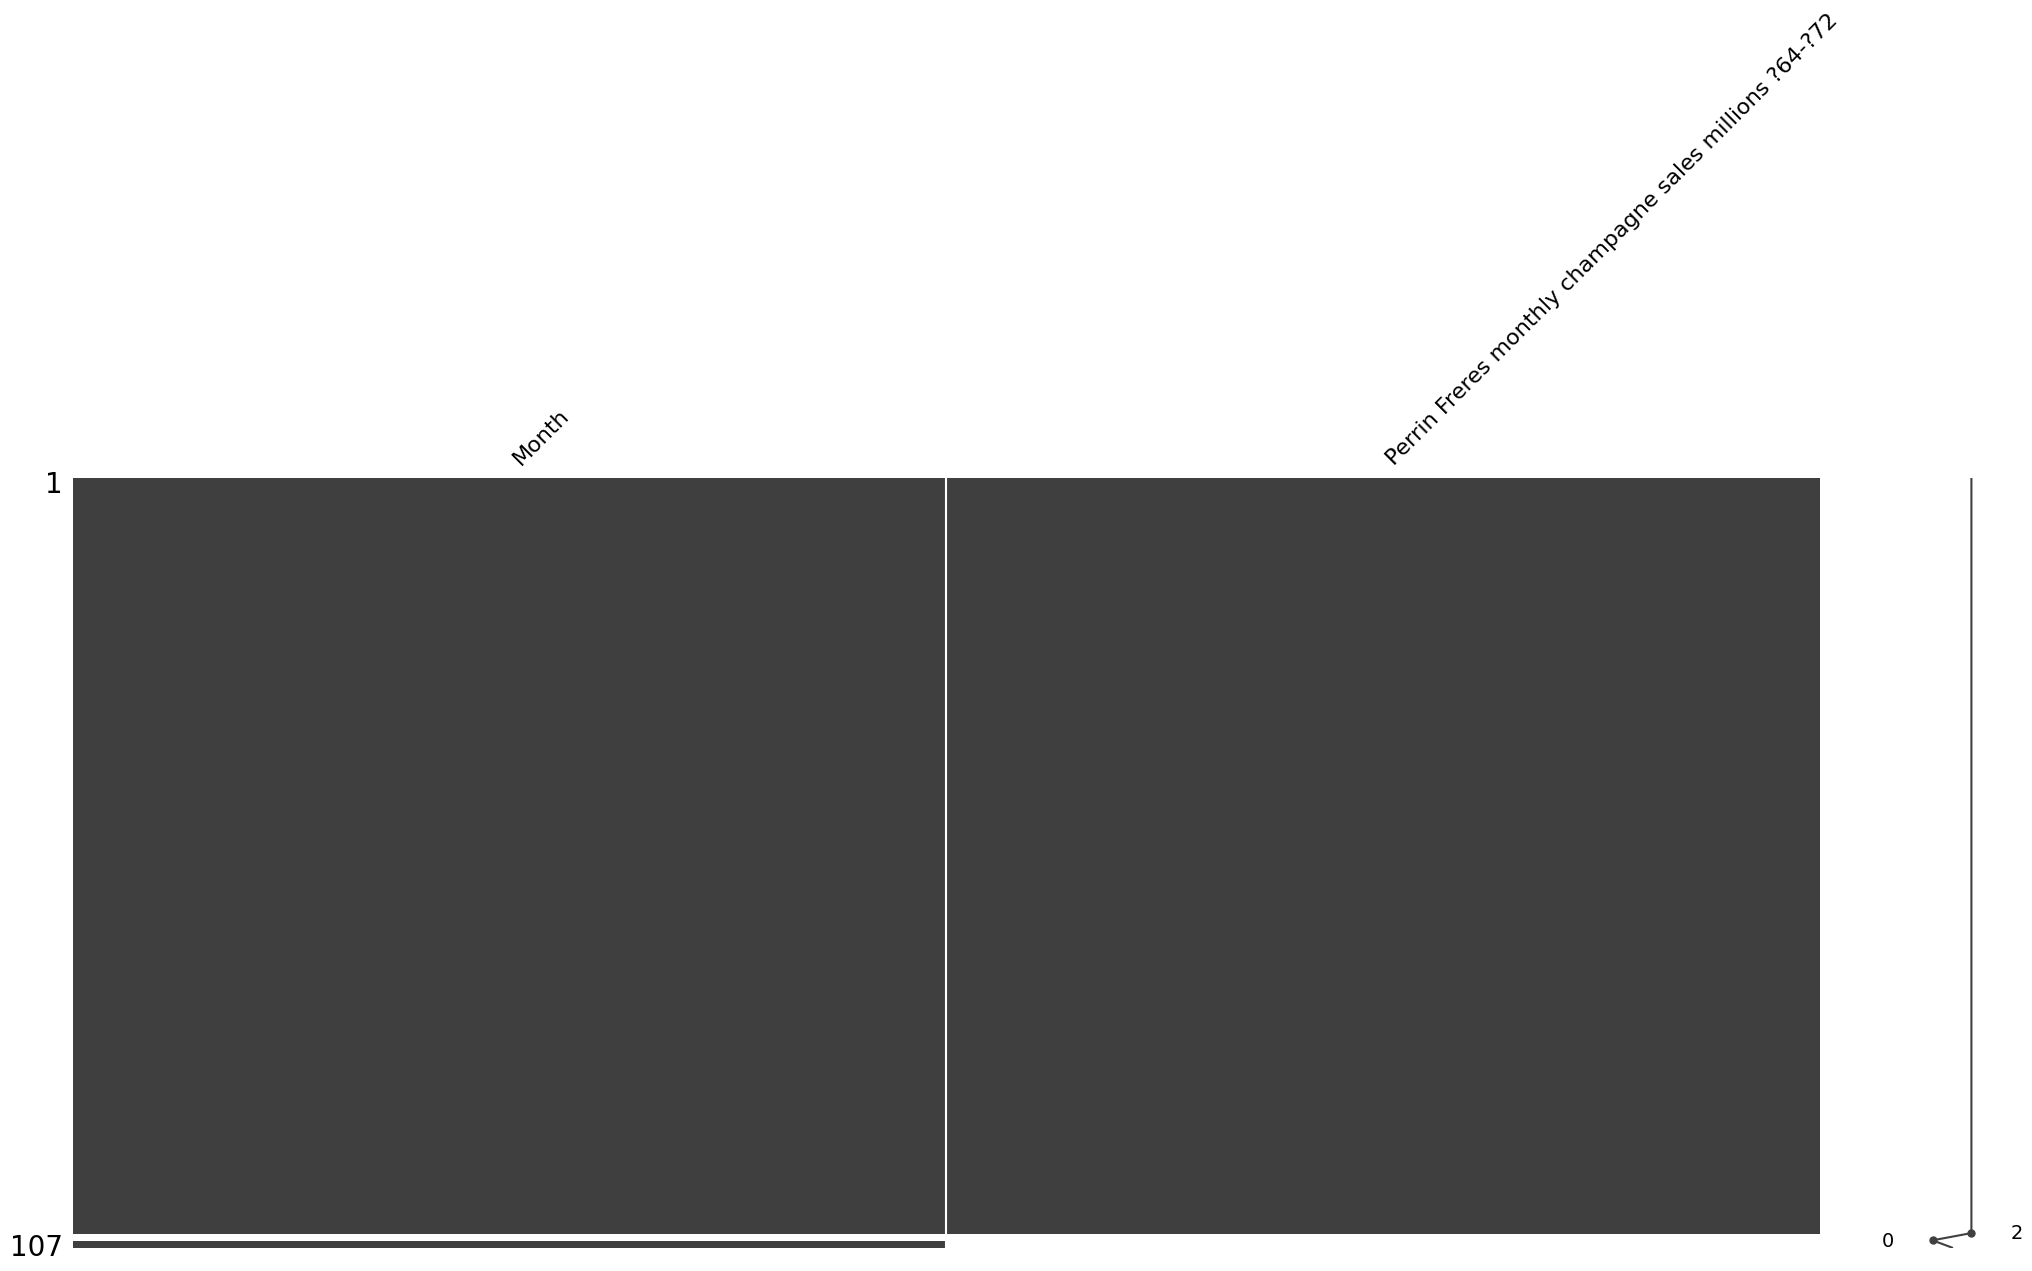

In [19]:
#visualization of null values
import missingno as msno
msno.matrix(champ)

<Axes: >

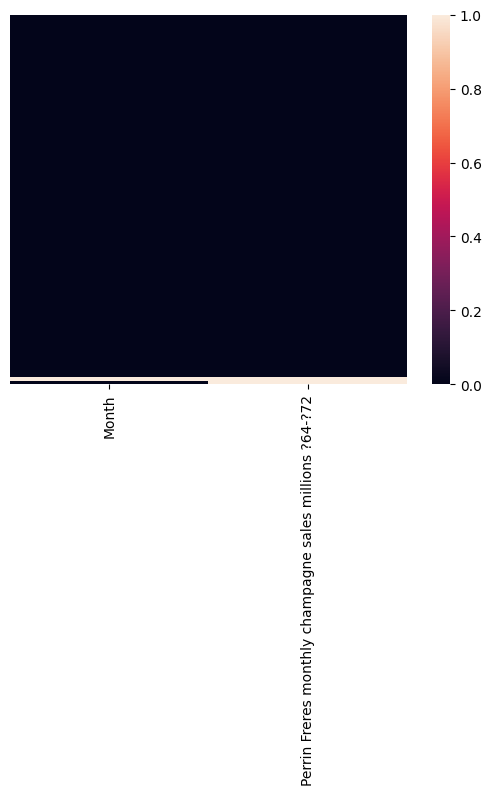

In [20]:
import seaborn as sns
sns.heatmap(champ.isnull(),yticklabels=False)

#  EDA-exploratory data analysis

In [21]:
#replace name
champ.rename({"Perrin Freres monthly champagne sales millions ?64-?72":"sales"},axis=1,inplace=True)
champ.columns

Index(['Month', 'sales'], dtype='object')

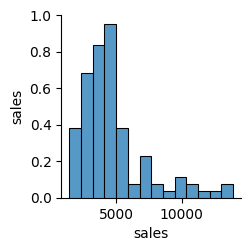

In [22]:
#pair plot
import seaborn as sns
sns.pairplot(champ)


In [23]:
# the missing values which are so little ,so we drop it
champ.dropna(inplace=True)
champ.isnull().sum()

Month    0
sales    0
dtype: int64

Text(0, 0.5, 'sales')

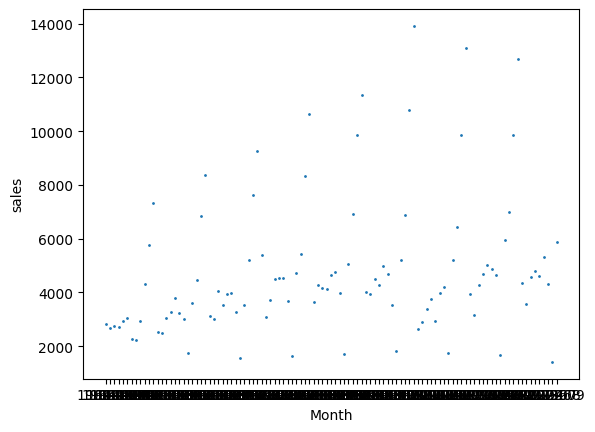

In [24]:
# Plot month vs. sales
import matplotlib.pyplot as plt
plt.scatter(champ["Month"],champ["sales"],s=1)
plt.xlabel('Month')
plt.ylabel('sales')

<Axes: ylabel='sales'>

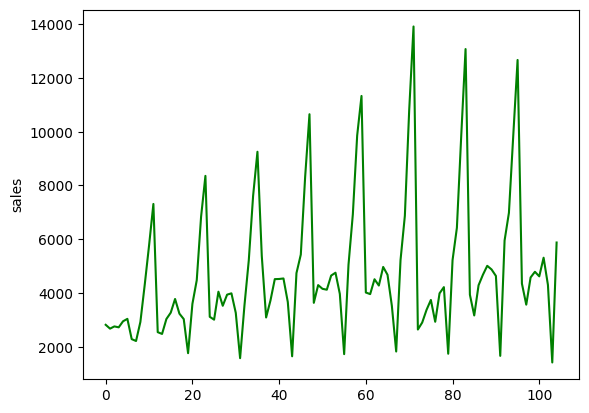

In [25]:
#line plot of our  target attribute
sns.lineplot(champ['sales'],color='green')

In [26]:
#change obj in int 64 datetime ns
champ['Month']=pd.to_datetime(champ['Month'])

In [27]:
#Extract year
champ['Month_year'] = champ['Month'].dt.year

champ.sample(5)

,Month,sales,Month_year
27,1966-04-01,3523.0,1966
22,1965-11-01,6838.0,1965
11,1964-12-01,7312.0,1964
104,1972-09-01,5877.0,1972
84,1971-01-01,3934.0,1971


# Extract Month

In [28]:
# Extract Month
champ['Month_no'] = champ['Month'].dt.month

champ.head()

,Month,sales,Month_year,Month_no
0,1964-01-01,2815.0,1964,1
1,1964-02-01,2672.0,1964,2
2,1964-03-01,2755.0,1964,3
3,1964-04-01,2721.0,1964,4
4,1964-05-01,2946.0,1964,5


Text(0, 0.5, "['sales']")

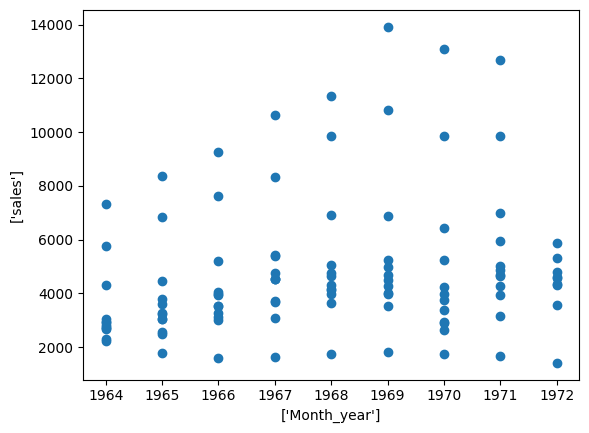

In [29]:
plt.scatter(champ['Month_year'],champ['sales'])
plt.xlabel(['Month_year'])
plt.ylabel(['sales'])

Text(0, 0.5, "['sales']")

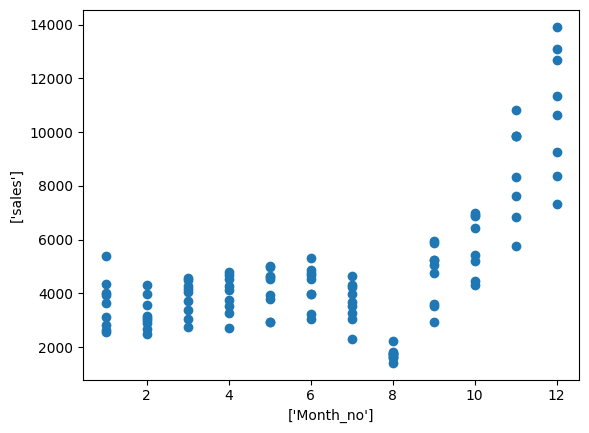

In [30]:
plt.scatter(champ['Month_no'],champ['sales'])
plt.xlabel(['Month_no'])
plt.ylabel(['sales'])

In [31]:
champ['Month_name'] = champ['Month'].dt.month_name()

champ.head()

,Month,sales,Month_year,Month_no,Month_name
0,1964-01-01,2815.0,1964,1,January
1,1964-02-01,2672.0,1964,2,February
2,1964-03-01,2755.0,1964,3,March
3,1964-04-01,2721.0,1964,4,April
4,1964-05-01,2946.0,1964,5,May


#Extract Days

In [32]:
#Extract Days
champ['Month_day'] = champ['Month'].dt.day

champ.head()

,Month,sales,Month_year,Month_no,Month_name,Month_day
0,1964-01-01,2815.0,1964,1,January,1
1,1964-02-01,2672.0,1964,2,February,1
2,1964-03-01,2755.0,1964,3,March,1
3,1964-04-01,2721.0,1964,4,April,1
4,1964-05-01,2946.0,1964,5,May,1


In [33]:
# day of week - name

champ['Month_dow_name'] = champ['Month'].dt.day_name()

champ.head()

,Month,sales,Month_year,Month_no,Month_name,Month_day,Month_dow_name
0,1964-01-01,2815.0,1964,1,January,1,Wednesday
1,1964-02-01,2672.0,1964,2,February,1,Saturday
2,1964-03-01,2755.0,1964,3,March,1,Sunday
3,1964-04-01,2721.0,1964,4,April,1,Wednesday
4,1964-05-01,2946.0,1964,5,May,1,Friday


In [34]:
# is weekend?

champ['date_is_weekend'] = np.where(champ['Month_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

champ.head()

,Month,sales,Month_year,Month_no,Month_name,Month_day,Month_dow_name,date_is_weekend
0,1964-01-01,2815.0,1964,1,January,1,Wednesday,0
1,1964-02-01,2672.0,1964,2,February,1,Saturday,1
2,1964-03-01,2755.0,1964,3,March,1,Sunday,1
3,1964-04-01,2721.0,1964,4,April,1,Wednesday,0
4,1964-05-01,2946.0,1964,5,May,1,Friday,0


In [35]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('1/1/1975')
ts

Timestamp('1975-01-01 00:00:00')

In [36]:
# compare a datetime Series with a timestamp
champ.loc[champ.Month >= ts, :].head()

,Month,sales,Month_year,Month_no,Month_name,Month_day,Month_dow_name,date_is_weekend


In [37]:
# perform mathematical operations with timestamps (outputs a timedelta object)
champ.Month.max() - champ.Month.min()

Timedelta('3166 days 00:00:00')

In [38]:
# timedelta objects also have attributes you can access
(champ.Month.max() - champ.Month.min()).days

3166

In [39]:
# count the number of UFO reports per year
champ['Year'] = champ.Month.dt.year
champ.Year.value_counts().sort_index().head()

1964    12
1965    12
1966    12
1967    12
1968    12
Name: Year, dtype: int64

##Extract week of the year

In [40]:
#Extract week of the year
champ['date_week'] = champ['Month'].dt.week

champ.head()

<ipython-input-40-06a402d91672>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  champ['date_week'] = champ['Month'].dt.week


,Month,sales,Month_year,Month_no,Month_name,Month_day,Month_dow_name,date_is_weekend,Year,date_week
0,1964-01-01,2815.0,1964,1,January,1,Wednesday,0,1964,1
1,1964-02-01,2672.0,1964,2,February,1,Saturday,1,1964,5
2,1964-03-01,2755.0,1964,3,March,1,Sunday,1,1964,9
3,1964-04-01,2721.0,1964,4,April,1,Wednesday,0,1964,14
4,1964-05-01,2946.0,1964,5,May,1,Friday,0,1964,18


##Extract Quarter

In [41]:
#Extract Quarter
champ['quarter'] = champ['Month'].dt.quarter

champ.head()

,Month,sales,Month_year,Month_no,Month_name,Month_day,Month_dow_name,date_is_weekend,Year,date_week,quarter
0,1964-01-01,2815.0,1964,1,January,1,Wednesday,0,1964,1,1
1,1964-02-01,2672.0,1964,2,February,1,Saturday,1,1964,5,1
2,1964-03-01,2755.0,1964,3,March,1,Sunday,1,1964,9,1
3,1964-04-01,2721.0,1964,4,April,1,Wednesday,0,1964,14,2
4,1964-05-01,2946.0,1964,5,May,1,Friday,0,1964,18,2


#Extract Semester

In [42]:
#Extract Semester
champ['semester'] = np.where(champ['quarter'].isin([1,2]), 1, 2)

champ.head()

,Month,sales,Month_year,Month_no,Month_name,Month_day,Month_dow_name,date_is_weekend,Year,date_week,quarter,semester
0,1964-01-01,2815.0,1964,1,January,1,Wednesday,0,1964,1,1,1
1,1964-02-01,2672.0,1964,2,February,1,Saturday,1,1964,5,1,1
2,1964-03-01,2755.0,1964,3,March,1,Sunday,1,1964,9,1,1
3,1964-04-01,2721.0,1964,4,April,1,Wednesday,0,1964,14,2,1
4,1964-05-01,2946.0,1964,5,May,1,Friday,0,1964,18,2,1


In [43]:
#Extract Time elapsed between dates
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2023, 8, 9, 5, 49, 52, 343463)

In [44]:
today - champ['Month']

0     21770 days 05:49:52.343463
1     21739 days 05:49:52.343463
2     21710 days 05:49:52.343463
3     21679 days 05:49:52.343463
4     21649 days 05:49:52.343463
                 ...            
100   18727 days 05:49:52.343463
101   18696 days 05:49:52.343463
102   18666 days 05:49:52.343463
103   18635 days 05:49:52.343463
104   18604 days 05:49:52.343463
Name: Month, Length: 105, dtype: timedelta64[ns]

In [45]:
#days til now today's date
(today - champ['Month']).dt.days

0      21770
1      21739
2      21710
3      21679
4      21649
       ...  
100    18727
101    18696
102    18666
103    18635
104    18604
Name: Month, Length: 105, dtype: int64

In [46]:
# check dtypes
champ.dtypes

Month              datetime64[ns]
sales                     float64
Month_year                  int64
Month_no                    int64
Month_name                 object
Month_day                   int64
Month_dow_name             object
date_is_weekend             int64
Year                        int64
date_week                   int64
quarter                     int64
semester                    int64
dtype: object

In [47]:
champ['sales'].mean()

4761.152380952381

In [48]:
#Unique values of target variable
champ['sales'].unique()

array([ 2815.,  2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,
        2922.,  4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,
        3776.,  3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,
        3113.,  3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,
        3528.,  5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,
        4520.,  4539.,  3663.,  1643.,  4739.,  5428.,  8314., 10651.,
        3633.,  4292.,  4154.,  4121.,  4647.,  4753.,  3965.,  1723.,
        5048.,  6922.,  9858., 11331.,  4016.,  3957.,  4510.,  4276.,
        4968.,  4677.,  1821.,  5222.,  6872., 10803., 13916.,  2639.,
        2899.,  3370.,  3740.,  2927.,  4217.,  1738.,  5221.,  6424.,
        9842., 13076.,  3934.,  3162.,  4286.,  4676.,  5010.,  4874.,
        4633.,  1659.,  5951.,  6981.,  9851., 12670.,  4348.,  3564.,
        4577.,  4788.,  4618.,  5312.,  4298.,  1413.,  5877.])

In [49]:

#columns of dataset
champ.columns

Index(['Month', 'sales', 'Month_year', 'Month_no', 'Month_name', 'Month_day',
       'Month_dow_name', 'date_is_weekend', 'Year', 'date_week', 'quarter',
       'semester'],
      dtype='object')

In [50]:
champ.drop(columns=['Month','Month_name','Month_dow_name'],inplace=True)
champ.head()

,sales,Month_year,Month_no,Month_day,date_is_weekend,Year,date_week,quarter,semester
0,2815.0,1964,1,1,0,1964,1,1,1
1,2672.0,1964,2,1,1,1964,5,1,1
2,2755.0,1964,3,1,1,1964,9,1,1
3,2721.0,1964,4,1,0,1964,14,2,1
4,2946.0,1964,5,1,0,1964,18,2,1


#Feature selection-

#our target variable is 'sales',and as a input only two variables we are going to take based on month and year

In [51]:
champ.shape

(105, 9)

#Define X and y

In [52]:
#as a input we use only year and month only as a given in dataset
X=champ[['Month_year','Month_no']]
y=champ['sales']

In [53]:
X.shape

(105, 2)

In [54]:
y.shape

(105,)

In [55]:
X

,Month_year,Month_no
0,1964,1
1,1964,2
2,1964,3
3,1964,4
4,1964,5
...,...,...
100,1972,5
101,1972,6
102,1972,7
103,1972,8


In [56]:
y

0      2815.0
1      2672.0
2      2755.0
3      2721.0
4      2946.0
        ...  
100    4618.0
101    5312.0
102    4298.0
103    1413.0
104    5877.0
Name: sales, Length: 105, dtype: float64

In [57]:
# Train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
# Step 2: Instantiate the model
lr = LinearRegression()

In [60]:
# Step 3: Fit the model
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
# Take a peek at the model coefficient and intercept

print(lr.intercept_) # Constant
print(lr.coef_)

-461572.26112249546
[235.41878676 497.42591632]


In [62]:
# Make predictions
y_pred =lr.predict(X_test)

In [63]:
y_pred

array([4743.05505536, 4951.88549931, 4454.45958299, 4716.46671255,
       6470.75159107, 7909.85265441, 7150.41960853, 7465.6034237 ,
       6261.92114711, 1287.66198394, 4507.6362686 , 5240.48097167,
       5422.72307282, 3171.012278  , 5187.30428607, 3277.36564921,
       6679.58203502, 6235.33280431, 1523.0807707 , 2753.35139009,
       4663.29002695, 5711.31854519, 6497.33993387, 4689.87836975,
       5973.32567475, 2700.17470448, 3015.35851965, 4978.47384211,
       3983.62200948, 5764.4952308 , 3433.01940756, 6759.34706343])

In [64]:
y_test.values

array([ 3260.,  4677.,  4968.,  4753.,  5428.,  9851.,  5877., 10651.,
        5764.,  2815.,  3028.,  1573.,  4874.,  4348.,  3986.,  2946.,
        5221.,  5211.,  2541.,  4047.,  4788.,  1723.,  6838.,  2927.,
        4739.,  2639.,  3266.,  3663.,  4520.,  4301.,  3162.,  7312.])

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
#Mean_absolute_error
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 1152.4280441862848


In [67]:
#Mean_absolute_error
print('MSE',mean_squared_error(y_test,y_pred))

MSE 2243280.8886390575


In [68]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1497.7586216206728


In [69]:
from sklearn.metrics import r2_score
r2_score=(y_test,y_pred)
r2_score

(30      3260.0
 65      4677.0
 64      4968.0
 53      4753.0
 45      5428.0
 94      9851.0
 104     5877.0
 47     10651.0
 10      5764.0
 0       2815.0
 18      3028.0
 31      1573.0
 89      4874.0
 96      4348.0
 77      3986.0
 4       2946.0
 80      5221.0
 33      5211.0
 12      2541.0
 26      4047.0
 99      4788.0
 55      1723.0
 22      6838.0
 76      2927.0
 44      4739.0
 72      2639.0
 15      3266.0
 42      3663.0
 40      4520.0
 9       4301.0
 85      3162.0
 11      7312.0
 Name: sales, dtype: float64,
 array([4743.05505536, 4951.88549931, 4454.45958299, 4716.46671255,
        6470.75159107, 7909.85265441, 7150.41960853, 7465.6034237 ,
        6261.92114711, 1287.66198394, 4507.6362686 , 5240.48097167,
        5422.72307282, 3171.012278  , 5187.30428607, 3277.36564921,
        6679.58203502, 6235.33280431, 1523.0807707 , 2753.35139009,
        4663.29002695, 5711.31854519, 6497.33993387, 4689.87836975,
        5973.32567475, 2700.17470448, 3015.3585196

In [70]:
lr.score(X_test,y_test)

0.4270276748003855

In [71]:
lr.score(X_train,y_train)

0.4374243257975241

# Cross validation

In [72]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(lr,X_train,y_train,cv=5)

In [73]:
val_score

array([-0.56283839, -0.35592455,  0.32649708,  0.61499161,  0.4786654 ])

In [74]:
val_score.mean()

0.10027823098297577

In [75]:
val_score.std()

0.47055845671224517

#Decision tree regressor

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)

In [77]:
# Fit model.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [78]:
# Evaluate model.

print(f'Score on training set: {regressor.score(X_train, y_train)}')
print(f'Score on testing set: {regressor.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.8646468180042071


In [79]:
from sklearn.model_selection import cross_val_score
val_score=cross_val_score(regressor,X_train,y_train,cv=5)

In [80]:
val_score

array([0.92329852, 0.65735976, 0.94165673, 0.7078698 , 0.88437811])

In [81]:
val_score.mean()

0.822912583164922

In [82]:
val_score.std()

0.11713078196108531

#Hyperparameter tunning

In [83]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [84]:
# fitting model


tuned_hyper_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [85]:
# prediction

tuned_pred=tuned_hyper_model.predict(X_test)

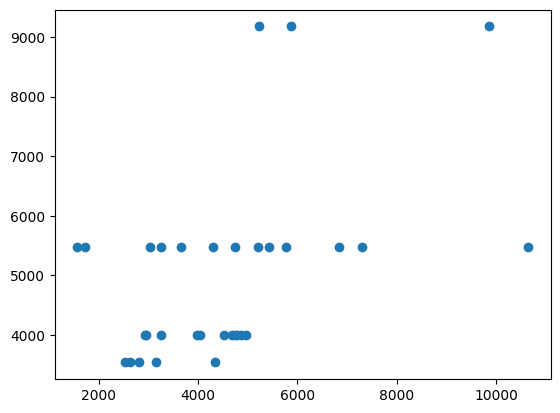

In [86]:
plt.scatter(y_test,tuned_pred)

In [87]:
# With hyperparameter tuned

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 1382.8107946832579
MSE: 3565742.7591202455
RMSE: 1888.3174413006532


# XGBRegressor

In [88]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 42)

In [89]:
# make a dictionary of hyperparameter values to search
search_space = {
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 6, 9],
    "gamma" : [0.01, 0.1],
    "learning_rate" : [0.001, 0.01, 0.1, 1]
}

In [90]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ["r2", "neg_root_mean_squared_error"], #sklearn.metrics.SCORERS.keys()
                  refit = "r2",
                  cv = 5,
                  verbose = 4)

In [91]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4148.627) r2: (test=-2.946) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3471.287) r2: (test=-5.435) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-6010.889) r2: (test=-2.475) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4910.856) r2: (test=-4.377) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-6569.096) r2: (test=-2.462) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-3745.023) r2: (test=-2.21

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [92]:
print(GS.best_estimator_) # to get the complete details of the best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


In [93]:
print(GS.best_params_) # to get only the best hyperparameter values that we searched for

{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}


In [94]:
print(GS.best_score_) # score according to the metric we passed in refit

0.9266455183504527


In [95]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv", index = False)

In [96]:
#Mean_absolute_error(Linear regression)
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))
print(GS.best_score_)
print(GS.best_params_)
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))
print(f'Score on Decision Tree Regressor training set: {regressor.score(X_train, y_train)}')
print(f'Score on Decision Tree Regressor testing set: {regressor.score(X_test, y_test)}')


MAE 1152.4280441862848
MSE 2243280.8886390575
RMSE 1497.7586216206728
0.9266455183504527
{'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500}
MAE: 1382.8107946832579
MSE: 3565742.7591202455
RMSE: 1888.3174413006532
Score on Decision Tree Regressor training set: 1.0
Score on Decision Tree Regressor testing set: 0.8646468180042071
